# 图像轮廓

边缘检测虽然能够检测出边缘，但边缘是不连续的，检测到的边缘并不是一个整体。图像轮廓是指将边缘连接起来形成的一个整体，用于后续的计算。

图像轮廓是图像中非常重要的一个特征信息，通过对图像轮廓的操作，我们能够获取目标图像的大小、位置、方向等信息。

## 注意

* 待处理的源图像必须是灰度二值图。因此，在通常情况下，都要预先对图像进行阈值分割或者边缘检测处理，得到满意的二值图像后再将其作为参数使用。


* 在OpenCV中，都是从黑色背景中查找白色对象。因此，对象必须是白色的，背景必须是黑色的。

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

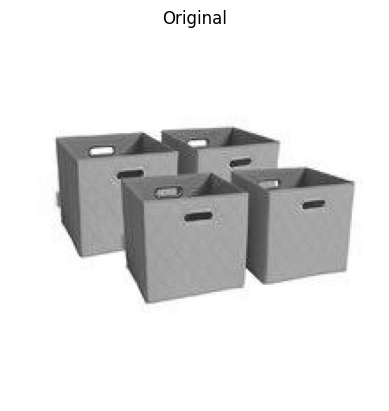

In [4]:
img = cv2.imread('images/containers.jpeg', 0)
show(img, 'Original')

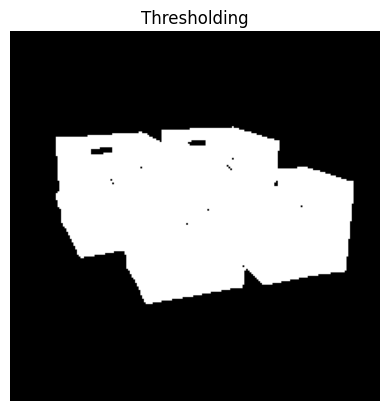

In [5]:
t, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show(binary, 'Thresholding')

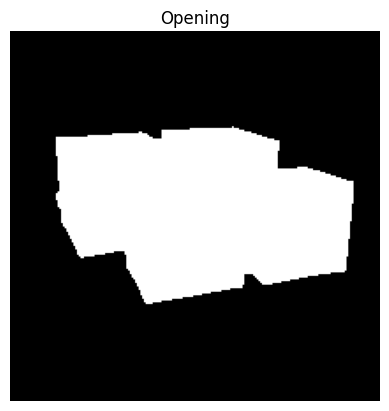

In [6]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
show(closing, 'Opening')

### 参数mode决定了轮廓的提取方式
● cv2.RETR_EXTERNAL：只检测外轮廓。

● cv2.RETR_LIST：对检测到的轮廓不建立等级关系。

● cv2.RETR_CCOMP：检索所有轮廓并将它们组织成两级层次结构。上面的一层为外边界，下面的一层为内孔的边界。如果内孔内还有一个连通物体，那么这个物体的边界仍然位于顶层。

● cv2.RETR_TREE：建立一个等级树结构的轮廓。

In [7]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

统计轮廓的个数

In [8]:
len(contours)

1

第一个轮廓的点数

In [9]:
len(contours[0])

166

## 绘制图像轮廓：drawContours函数

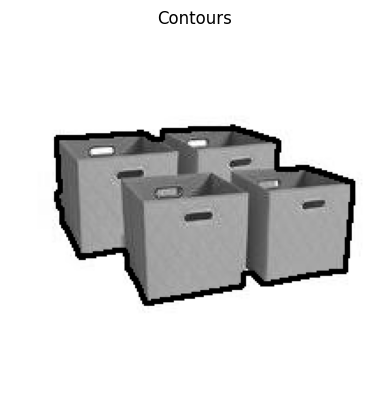

In [10]:
contours_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)
show(contours_img, 'Contours')

# 矩特征

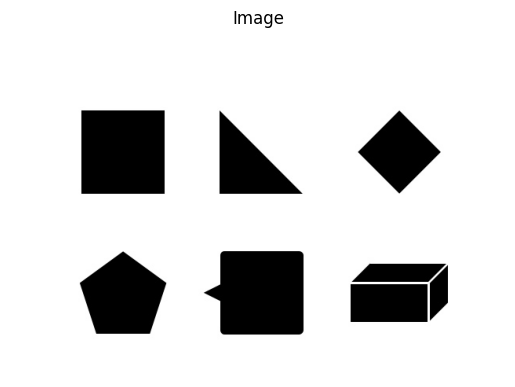

In [11]:
img = cv2.imread('images/shape.jpg', 0)
show(img)

In [12]:
ret, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
n = len(contours)
n

8

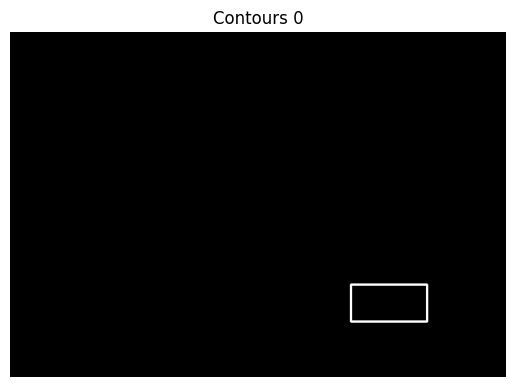

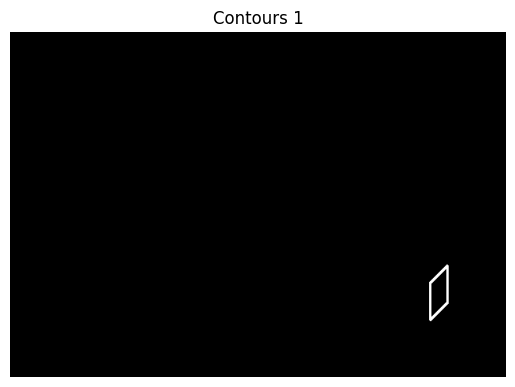

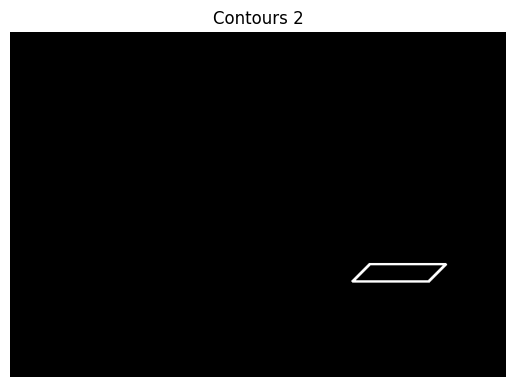

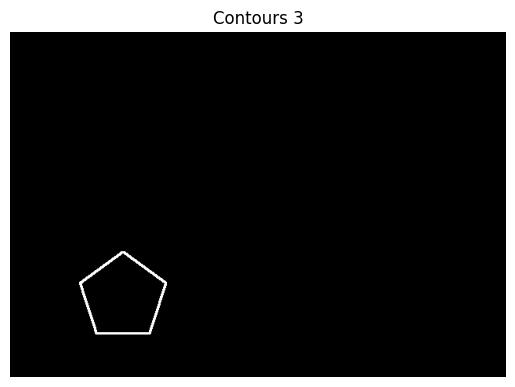

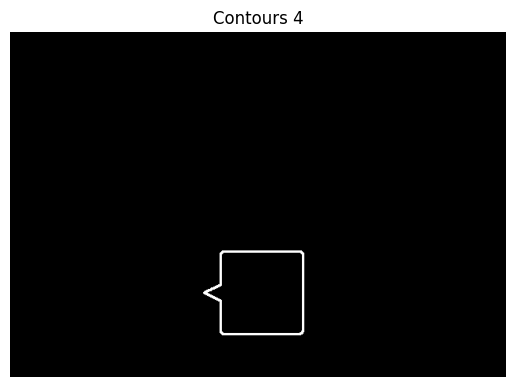

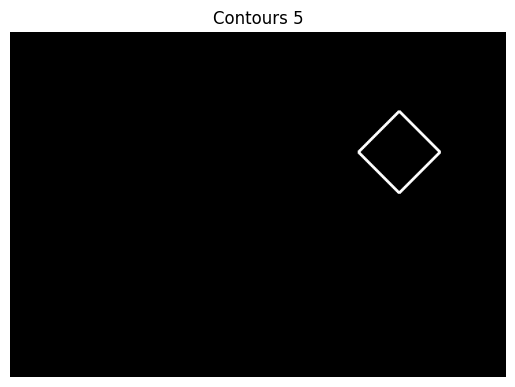

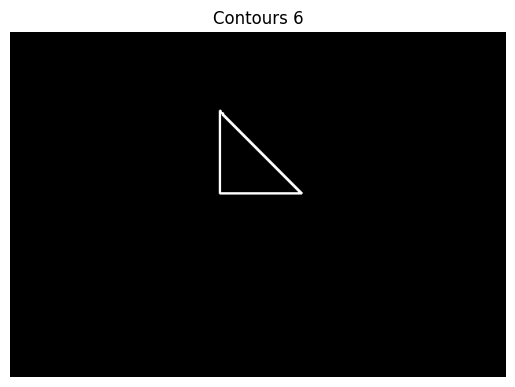

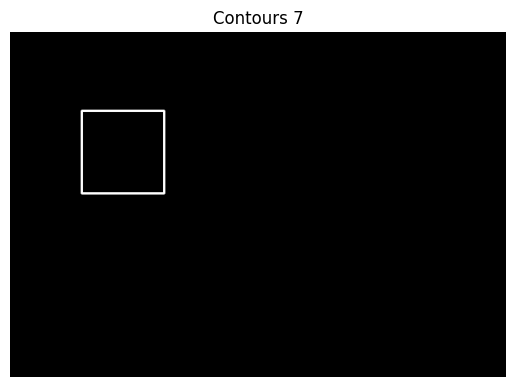

In [13]:
contoursImg = []
for i in range(n):
  tmp = np.zeros(img.shape, np.uint8)
  contoursImg.append(tmp)
  contoursImg[i] = cv2.drawContours(contoursImg[i], contours, i, (255, 255, 255), 2)
  show(contoursImg[i], 'Contours ' + str(i))

各个轮廓的矩

In [14]:
for i in range(n):
  print('Contour ' + str(i) + ' has ' + str(len(contours[i])) + ' points')
  print('轮廓' + str(i) +'的矩: \n', cv2.moments(contours[i]))

Contour 0 has 4 points
轮廓0的矩: 
 {'m00': 4559.0, 'm10': 2199717.5, 'm01': 1575134.5, 'm20': 1064938329.6666666, 'm11': 760002396.25, 'm02': 545048205.6666666, 'm30': 517282267723.75, 'm21': 367936192899.8333, 'm12': 262985759234.16666, 'm03': 188894067076.25, 'mu20': 3574635.9166665077, 'mu11': 0.0, 'mu02': 839235.9166666269, 'mu30': 0.0001220703125, 'mu21': -8.749961853027344e-05, 'mu12': 8.940696716308594e-06, 'mu03': 3.0517578125e-05, 'nu20': 0.17198581560282925, 'nu11': 0.0, 'nu02': 0.04037800687285033, 'nu30': 8.698333922005937e-14, 'nu21': -6.23493857300035e-14, 'nu12': 6.370850040531692e-15, 'nu03': 2.1745834805014843e-14}
Contour 1 has 4 points
轮廓1的矩: 
 {'m00': 1034.0, 'm10': 564564.0, 'm01': 343805.0, 'm20': 308293648.6666666, 'm11': 187675825.3333333, 'm02': 114547209.33333333, 'm30': 168373873668.0, 'm21': 102462096685.66667, 'm12': 62515042692.666664, 'm03': 38241258247.5, 'mu20': 41704.66666662693, 'mu11': -41704.666666686535, 'mu02': 232046.83333332837, 'mu30': 6.103515625

In [15]:
for i in range(n):
  if cv2.moments(contours[i])['m00'] > 5000:
    print('轮廓' + str(i) +'的面积: \n', cv2.moments(contours[i])['m00'])

轮廓3的面积: 
 7835.0
轮廓4的面积: 
 11219.5
轮廓5的面积: 
 5407.0
轮廓6的面积: 
 5410.5
轮廓7的面积: 
 11025.0


## 计算轮廓的长度：arcLength函数

In [16]:
for i in range(n):
  print('轮廓' + str(i) +'的长度是: \n', int(cv2.arcLength(contours[i], True)))

轮廓0的长度是: 
 288
轮廓1的长度是: 
 156
轮廓2的长度是: 
 256
轮廓3的长度是: 
 353
轮廓4的长度是: 
 442
轮廓5的长度是: 
 292
轮廓6的长度是: 
 357
轮廓7的长度是: 
 420


# Hu矩

Hu矩（或者更确切地说是Hu矩不变量）是使用对图像变换不变的中心矩计算的一组7个变量。事实证明，前6个矩不变量对于平移，缩放，旋转和映射都是不变的。而第7个矩会因为图像映射而改变。

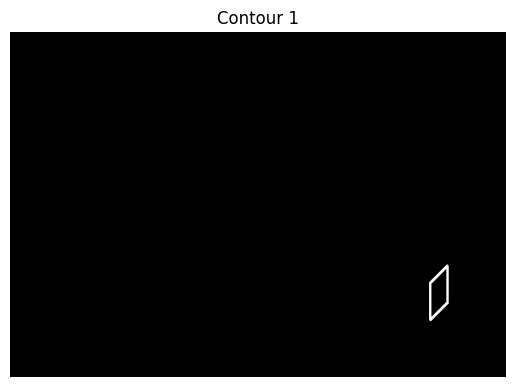

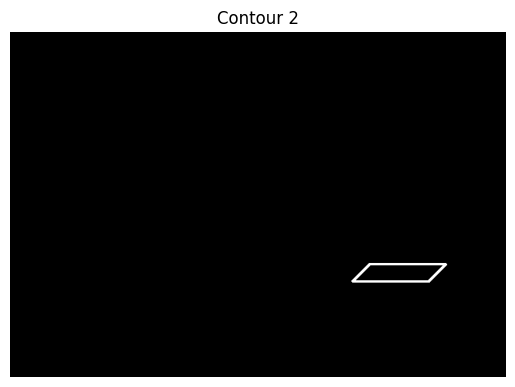

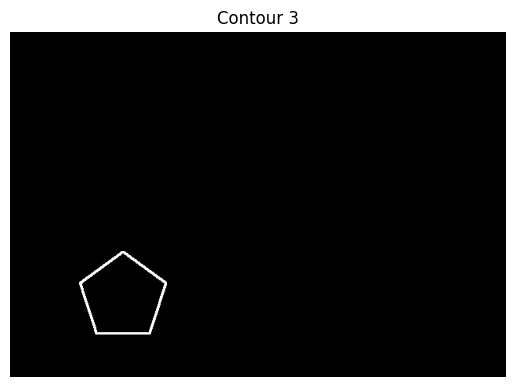

In [17]:
HuM1 = cv2.HuMoments(cv2.moments(contours[1]))
HuM2 = cv2.HuMoments(cv2.moments(contours[2]))
HuM3 = cv2.HuMoments(cv2.moments(contours[3]))
show(contoursImg[1], 'Contour 1')
show(contoursImg[2], 'Contour 2')
show(contoursImg[3], 'Contour 3')

In [18]:
HuM1 - HuM2

array([[-1.49180442e-01],
       [-9.86484641e-02],
       [ 7.38301406e-24],
       [ 5.41886747e-24],
       [ 3.71350072e-47],
       [-9.05889296e-25],
       [-1.19360351e-47]])

In [19]:
HuM1 - HuM3

array([[ 9.41986894e-02],
       [ 3.77807082e-02],
       [-2.25362878e-08],
       [-1.39474038e-11],
       [-3.79507139e-21],
       [ 6.37771095e-15],
       [-6.83685979e-21]])

## 形状匹配

我们可以通过Hu矩来判断两个对象的一致性。

例如，计算两个对象Hu矩的差，但是结果比较抽象。为了更直观方便地比较Hu矩值，OpenCV提供了函数cv2.matchShapes()，对两个对象的Hu矩进行比较。

In [20]:
retVal = cv2.matchShapes(contours[1], contours[2], 1, 0.0)

不相似图像cv2.matchShapes()函数返回值的差较大。

In [21]:
retVal

1.3120257981699277

# 轮廓拟合

好家伙，突然想到物体识别。应该就是用的这个进行标注。

* 矩形包围框
* 最小包围矩形框
* 最小包围圆形
* 最优拟合椭圆
* 最小外包三角形
* 逼近多边形

## 矩形包围框

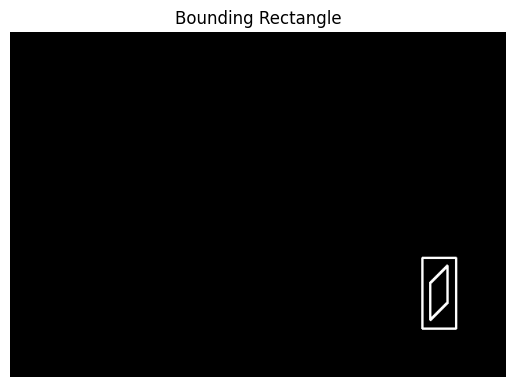

In [22]:
x, y, w, h = cv2.boundingRect(contours[1])
x = x - 10
y = y - 10
w = w + 20
h = h + 20
brcnt = np.array([[[x, y]], [[x + w, y]], [[x + w, y + h]], [[x, y + h]]])
cv2.drawContours(contoursImg[1], [brcnt], 0, (255, 0, 0), 2)
show(contoursImg[1], 'Bounding Rectangle')

# 凸包

凸包跟逼近多边形很像，只不过它是物体最外层的“凸”多边形。凸包指的是完全包含原有轮廓，并且仅由轮廓上的点所构成的多边形。凸包的每一处都是凸的，即在凸包内连接任意两点的直线都在凸包的内部。

OpenCV提供函数cv2.convexHull()用于获取轮廓的凸包。

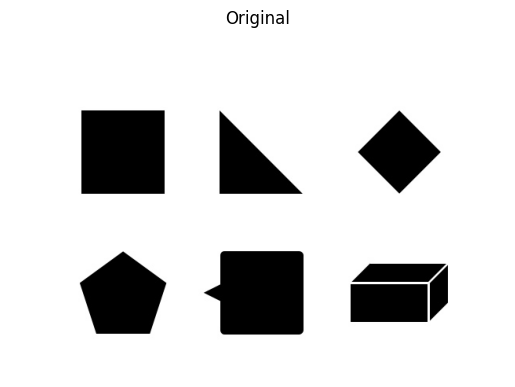

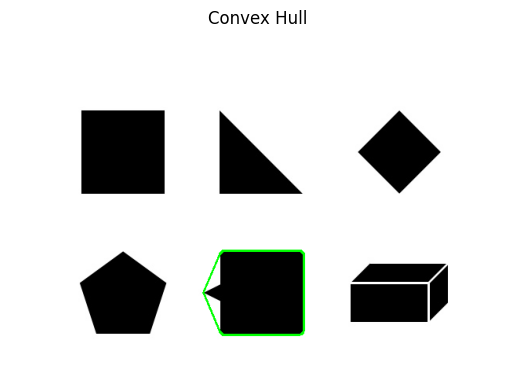

In [25]:
# --------------读取并绘制原始图像------------------
o = cv2.imread('images/shape.jpg')
show(o, 'Original')
# --------------提取轮廓------------------
gray = cv2.cvtColor(o, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray,127,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary,
                                        cv2.RETR_LIST,
                                        cv2.CHAIN_APPROX_SIMPLE)
# --------------寻找凸包，得到凸包的角点------------------
hull = cv2.convexHull(contours[4])
# --------------绘制凸包------------------
cv2.polylines(o, [hull], True, (0, 255, 0), 2)
# --------------显示凸包------------------
show(o, 'Convex Hull')

## 凸凹陷

凸包与轮廓之间的部分，称为凸缺陷。在OpenCV中使用函数cv2.convexityDefects()获取凸缺陷。

式中的返回值convexityDefects为凸缺陷点集。它是一个数组，每一行包含的值是[起点，终点，轮廓上距离凸包最远的点，最远点到凸包的近似距离]。

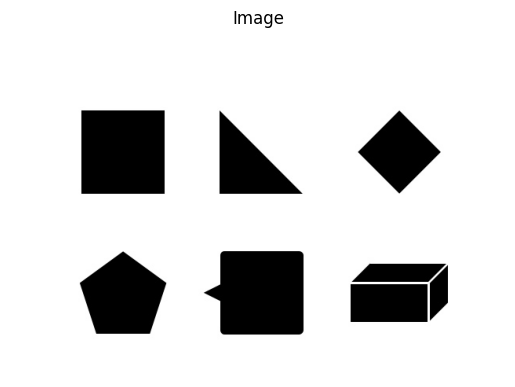

defects=
 [[[   3    5    4  114]]

 [[   6    8    7  114]]

 [[  10   31   11 3866]]

 [[  31   50   49 3933]]]


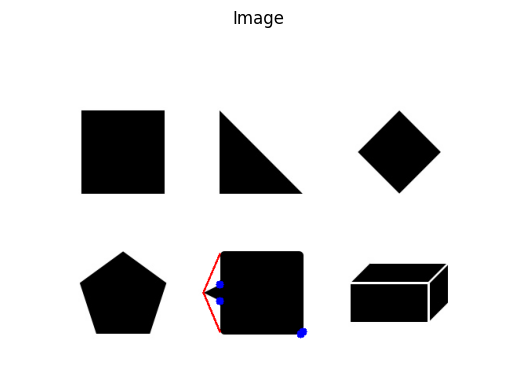

In [33]:
#----------------原图--------------------------
img = cv2.imread('images/shape.jpg')
show(img)
#----------------构造轮廓--------------------------
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255,0)
contours, hierarchy = cv2.findContours(binary,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
#----------------凸包--------------------------
cnt = contours[5]
hull = cv2.convexHull(cnt, returnPoints = False)
defects = cv2.convexityDefects(cnt, hull)
print("defects=\n", defects)
#----------------构造凸缺陷--------------------------
for i in range(len(defects)):
    s, e, f, d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img, start, end, [0,0,255],2)
    cv2.circle(img, far,5, [255,0,0], -1)
#----------------显示结果，释放图像--------------------------
show(img)

## 其他

* 测试轮廓是否是凸形的
* 点到轮廓的距离

# 利用形状场景算法比较轮廓

用矩比较形状是一种非常有效的方法，不过现在有了更有效的方法。从OpenCV 3开始，有了专有模块shape，该模块中的形状场景算法能够更高效地比较形状。

OpenCV提供了函数cv2.createShapeContextDistanceExtractor()，用于计算形状场景距离。

OpenCV提供了函数cv2.createHausdorffDistanceExtractor()来计算Hausdorff距离。